## Observations and Insights 

1. Based on the summary statistics, figures and tables generated for the drug regiment of interest, 
Ramicane seems to have the most positive results out of all with Capomulin on the close second.

2. Also based on the four Drug Regimen of interest, Infubinol is the only one having a potetial outliers (1).

3. Lastly, based on the average tumour volume and mouse weight, 
seems that mouse weight will have an strong impact on the tumour volume. 
as the Scatterplot showing a strong positive correlation (0.83).
so the heavier the mice, the drug will have less impact

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_data_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
pymaceuticals_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = pymaceuticals_data_complete["Mouse ID"].unique()
print(f'Total Mices for this research observation:  {len(total_mice)}')

Total Mices for this research observation:  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pymaceuticals_data_complete[pymaceuticals_data_complete.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = pymaceuticals_data_complete[pymaceuticals_data_complete['Mouse ID'] == 'g989' ]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_data_cleaned = pd.DataFrame(pymaceuticals_data_complete[pymaceuticals_data_complete['Mouse ID'] != 'g989' ])
pymaceuticals_data_cleaned.reset_index(inplace = True, drop = True)
pymaceuticals_data_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of mices left after removing bad data / duplicates: {len(pymaceuticals_data_cleaned["Mouse ID"].unique())}')

Number of mices left after removing bad data / duplicates: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 

p_data_cleaned_gb = pymaceuticals_data_cleaned.groupby(["Drug Regimen"]).describe()
p_data_cleaned_gb["Tumour Volume (mm3)"][['mean','std']]

drug_regimen_names = pymaceuticals_data_cleaned['Drug Regimen'].sort_values().unique()
# print(drug_regimen_names)

drug_regimen_mean = pymaceuticals_data_cleaned.groupby(["Drug Regimen"]).mean()
# p_data_cleaned_gb["Tumour Volume (mm3)"]['mean']
drug_regimen_mean_list = list(drug_regimen_mean["Tumour Volume (mm3)"])
# print(drug_regimen_mean)

drug_regimen_std = pymaceuticals_data_cleaned.groupby(["Drug Regimen"]).std()
# p_data_cleaned_gb["Tumour Volume (mm3)"]['std']
drug_regimen_std_list = list(drug_regimen_std["Tumour Volume (mm3)"])
# print(drug_regimen_std)
                                                             
drug_regimen_var = pymaceuticals_data_cleaned.groupby(["Drug Regimen"]).var()
# print(drug_regimen_var["Tumour Volume (mm3)"])
drug_regimen_var_list = list(drug_regimen_var["Tumour Volume (mm3)"])

drug_regimen_med = pymaceuticals_data_cleaned.groupby(["Drug Regimen"]).median()
# print(drug_regimen_med["Tumour Volume (mm3)"])
drug_regimen_med_list = list(drug_regimen_med["Tumour Volume (mm3)"])

drug_regimen_sem = pymaceuticals_data_cleaned.groupby(["Drug Regimen"]).sem()
# print(drug_regimen_sem["Tumour Volume (mm3)"])
drug_regimen_sem_list = list(drug_regimen_sem["Tumour Volume (mm3)"])

# Assemble the resulting series into a single summary dataframe (summary statistics).
summary_statistics_df = pd.DataFrame({'Drug Regimen':drug_regimen_names,
                                  'mean':drug_regimen_mean_list,
                                  'median':drug_regimen_med_list,
                                  'variance':drug_regimen_var_list,
                                  'standard deviation':drug_regimen_std_list,
                                  'SEM':drug_regimen_sem_list}).set_index('Drug Regimen')

summary_statistics_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
p_data_cleaned_gb2 = pymaceuticals_data_cleaned.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line
p_data_cleaned_gb2[["Tumour Volume (mm3)"]].agg(['mean','median','var','std','sem'])

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

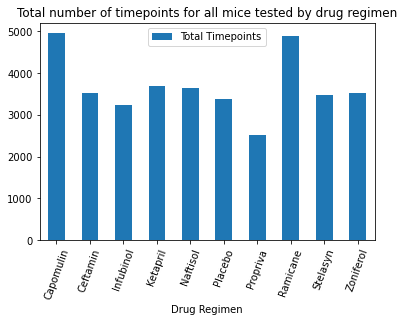

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# preparing / structuring the dataframe so we can find the desired  x and y axis for plotting
pymaceuticals_data_cleaned_barc = pymaceuticals_data_cleaned.groupby(["Drug Regimen"])["Timepoint"].sum().reset_index()
pymaceuticals_data_cleaned_barc.columns = ["Drug Regimen", "Total Timepoints"]
# print(pymaceuticals_data_cleaned_barc)
# Display the Bar plot using Pandas Dataframe
pymaceuticals_data_cleaned_barc.plot.bar(x="Drug Regimen", y="Total Timepoints", rot=70, title="Total number of timepoints for all mice tested by drug regimen")
plt.show(block=True)

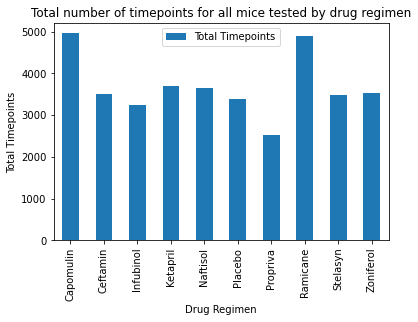

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Using the same x and y axis / data, Display the Bar plot using pyplot instead
pymaceuticals_data_cleaned_barc.plot(kind='bar',y='Total Timepoints',x='Drug Regimen')
plt.title('Total number of timepoints for all mice tested by drug regimen')
plt.ylabel('Total Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

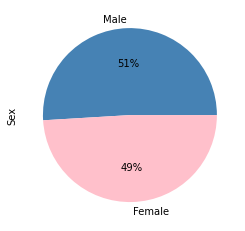

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# get the numbers for male and female method 1
pymaceuticals_data_cleaned_piec = pymaceuticals_data_cleaned["Sex"].value_counts()
# print(pymaceuticals_data_cleaned_piec)

# get the numbers for male and female method 2
mouse_metadata_clean = pymaceuticals_data_cleaned.groupby(["Sex"])["Mouse ID"].count()
# print(mouse_metadata_clean)

#display the pie plot using pandas
colours = ['steelblue','pink']
pymaceuticals_data_cleaned_piec.plot(kind='pie', y='Mice Genders', autopct='%1.0f%%', colors = colours)
plt.show(block=True)

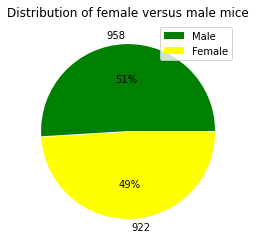

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Using the same data as above, Display the plot using mathplotlib
explode = (0,0.01)
colours = {"yellow","green"}
plt.pie(pymaceuticals_data_cleaned_piec, labels = pymaceuticals_data_cleaned["Sex"].value_counts(), explode=explode, autopct='%1.0f%%', colors = colours)
plt.legend(labels=pymaceuticals_data_cleaned["Sex"].unique(),loc="best")
plt.title('Distribution of female versus male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# filtered the dataframe so it will ony show data from the targeted drug regimen
filtering = np.where(((pymaceuticals_data_cleaned["Drug Regimen"] == "Capomulin") | (pymaceuticals_data_cleaned["Drug Regimen"] == "Ramicane") | 
                     (pymaceuticals_data_cleaned["Drug Regimen"] == "Infubinol") | (pymaceuticals_data_cleaned["Drug Regimen"] == "Ceftamin")))

# Start by getting the last (greatest) timepoint for each mouse
p_data_cleaned_gb3 = pymaceuticals_data_cleaned.loc[filtering].groupby(["Mouse ID"])["Timepoint"].max()
# print(pymaceuticals_data_cleaned.groupby(["Mouse ID"])["Timepoint"].max())
# print(p_data_cleaned_gb3)

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
pymaceuticals_data_complete_with_lasttimepoint = pd.merge(p_data_cleaned_gb3,pymaceuticals_data_cleaned[["Mouse ID","Drug Regimen","Timepoint","Tumour Volume (mm3)"]], how="left", on=["Mouse ID", "Timepoint"])
pymaceuticals_data_complete_with_lasttimepoint.sort_values(by="Drug Regimen").reset_index(drop = True)


,Mouse ID,Timepoint,Drug Regimen,Tumour Volume (mm3)
0,l897,45,Capomulin,38.846876
1,j119,45,Capomulin,38.125164
2,j246,35,Capomulin,38.753265
3,u364,45,Capomulin,31.023923
4,g316,45,Capomulin,40.159220
...,...,...,...,...
95,j913,45,Ramicane,31.560470
96,j989,45,Ramicane,36.134852
97,k403,45,Ramicane,22.050126
98,m546,45,Ramicane,30.564625


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumours_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumour volumes
for drug in treatments: 
    temp_df = pymaceuticals_data_complete_with_lasttimepoint.loc[pymaceuticals_data_complete_with_lasttimepoint["Drug Regimen"] == drug]
    # print(temp_df)
    
    # add subset
    values = temp_df["Tumour Volume (mm3)"]
    tumours_vol_data.append(values)
    #print(temp_df.reset_index())
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    print(f'The lowerq (Lower Quartile) for {drug}: {lowerq}')
    print(f'The upperq (Upper Quartile) for {drug}: {upperq}')
    iqr = upperq-lowerq
    print(f'The IQR (Interquartile range) for {drug}: {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'The Lower Bound for {drug}: {lower_bound}')
    print(f'The Upper Bound for {drug}: {upper_bound}')
    outliers_count = (values.loc[(pymaceuticals_data_complete_with_lasttimepoint['Tumour Volume (mm3)'] >= upper_bound) | 
                                        (pymaceuticals_data_complete_with_lasttimepoint['Tumour Volume (mm3)'] <= lower_bound)]).count()
    print(f'Potential Number of {drug} outliers: {outliers_count}')
    print()

The lowerq (Lower Quartile) for Capomulin: 32.37735684
The upperq (Upper Quartile) for Capomulin: 40.1592203
The IQR (Interquartile range) for Capomulin: 7.781863460000004
The Lower Bound for Capomulin: 20.70456164999999
The Upper Bound for Capomulin: 51.83201549
Potential Number of Capomulin outliers: 0

The lowerq (Lower Quartile) for Ramicane: 31.56046955
The upperq (Upper Quartile) for Ramicane: 40.65900627
The IQR (Interquartile range) for Ramicane: 9.098536719999998
The Lower Bound for Ramicane: 17.912664470000003
The Upper Bound for Ramicane: 54.30681135
Potential Number of Ramicane outliers: 0

The lowerq (Lower Quartile) for Infubinol: 54.04860769
The upperq (Upper Quartile) for Infubinol: 65.52574285
The IQR (Interquartile range) for Infubinol: 11.477135160000003
The Lower Bound for Infubinol: 36.83290494999999
The Upper Bound for Infubinol: 82.74144559000001
Potential Number of Infubinol outliers: 1

The lowerq (Lower Quartile) for Ceftamin: 48.72207785
The upperq (Upper Qua

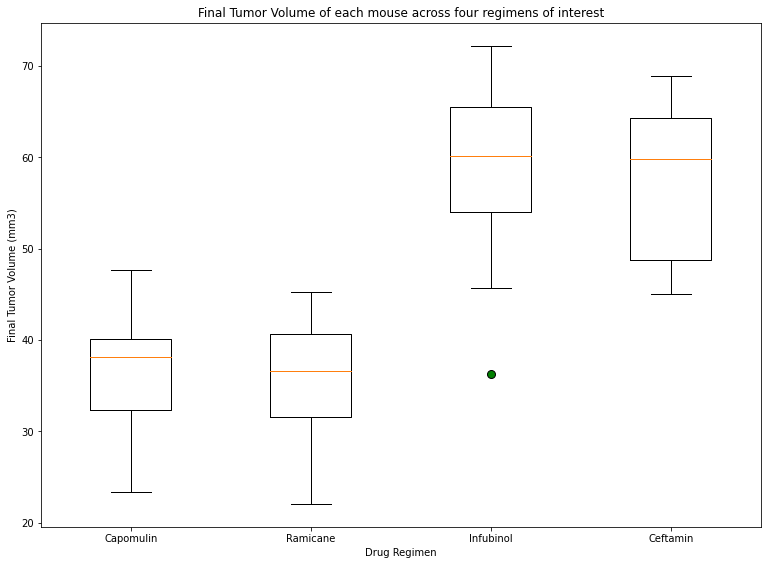

In [29]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

# pandas boxplit methods
# pymaceuticals_data_complete_with_lasttimepoint.boxplot(by ="Drug Regimen", column =["Tumour Volume (mm3)"], grid = False)

#Edit plot for boxplot presentation purposes
cosmetics = dict(marker='o', markerfacecolor='g', markersize=8, markeredgecolor='black') 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 

# Creating plot
plt.boxplot(tumours_vol_data, flierprops=cosmetics)

# Add title and labels to boxplot
plt.title('Final Tumor Volume of each mouse across four regimens of interest')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
 
# show mathplotlib plot
plt.show()

## Line and Scatter Plots

Line graph: 


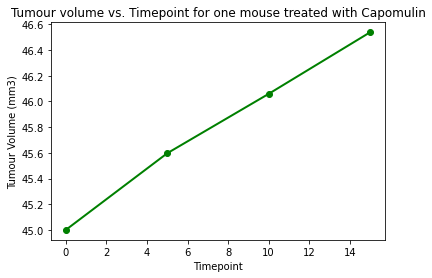

In [30]:
# Generate a line plot of tumour volume vs. time point for one mouse treated with Capomulin
# Selecting random mouse id that is on Capomulin regimen
mouse_timepoint = pymaceuticals_data_cleaned.loc[pymaceuticals_data_cleaned["Mouse ID"] == "r157"]

#plotting a line graph
print("Line graph: ")
plt.plot(mouse_timepoint["Timepoint"], mouse_timepoint["Tumour Volume (mm3)"], color='green', linewidth=2.0, marker ='o' )

# add Labels and Title
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Tumour volume vs. Timepoint for one mouse treated with Capomulin")

# Display the line graph / plot
plt.show()



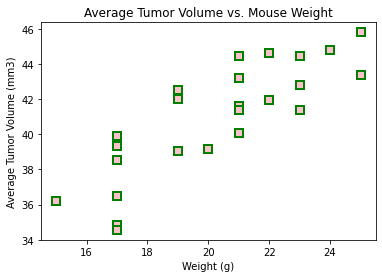

In [31]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

# preparing the data by isolating all mices thats on Capomulin regimen
capo_tumour_vol = pymaceuticals_data_cleaned.loc[pymaceuticals_data_cleaned["Drug Regimen"] == "Capomulin"]
# print(capo_tumour_vol)
# Get the average tumour volume of all mices thats on Capomulin regimen
p_data_cleaned_gb4 = capo_tumour_vol.groupby(["Mouse ID"])["Tumour Volume (mm3)"].mean()

# Merge the average / mean tumour volume on capomulin data with the all mices thats on capomulin data
scatter_plot_data = pd.merge(p_data_cleaned_gb4, capo_tumour_vol, how="left", on=["Mouse ID", "Mouse ID"])

# using the merge data, determine the correct x and y axis for our scatter plot
x1 = scatter_plot_data["Weight (g)"]
y1 = scatter_plot_data["Tumour Volume (mm3)_x"]

# creating scatter plot
plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)

# Adding labels & titles
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume vs. Mouse Weight')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between both factors is 0.83


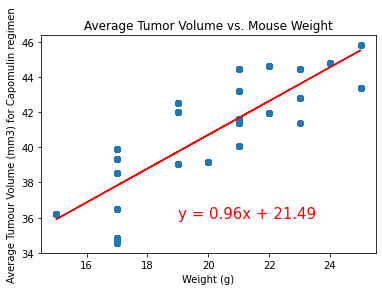

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

# print(scatter_plot_data)

# using the same dataframe as above (because we are still comparing mouse weight and average tumour volume for the Capomulin regimen)

#define the x and y for correlation & regression formula
x1 = scatter_plot_data["Weight (g)"]
y1 = scatter_plot_data["Tumour Volume (mm3)_x"]

# plt.scatter(x1,y1)
# use the correlation formula to shot correlation on both
correlation = st.pearsonr(x1,y1)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# use the regression and lineregression formula imported from spicy.stats dependencies above)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# creating the scatter plot
plt.scatter(x1,y1)
# display the regression values / line
plt.plot(x1,regress_values,"r-")
# display the line equation in the plot
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

# add labels and title
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumour Volume (mm3) for Capomulin regimen")
plt.title('Average Tumor Volume vs. Mouse Weight')

#display all the plot above
plt.show()

